In [1]:
# Import the necessary libraries for the task.
import torch  # Import PyTorch for deep learning.
import torch.nn as nn  # Import the neural network module from PyTorch.
import torch.nn.functional as F  # Import the functional module from PyTorch for activation functions.

import numpy as np  # Import NumPy for numerical operations.
import matplotlib.pyplot as plt  # Import Matplotlib for plotting.
from IPython import display  # Import IPython display for rendering plots.
display.set_matplotlib_formats('svg')  # Set the plot format to SVG.


C:\Users\fafzali\AppData\Local\Temp\ipykernel_30784\2228048250.py:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')  # Set the plot format to SVG.


In [2]:
# Import the Iris dataset using Seaborn and store it as 'iris'.
import seaborn as sns
iris = sns.load_dataset('iris')

# Convert the dataset from a Pandas DataFrame to a PyTorch tensor and set the data type to float.
data = torch.tensor(iris[iris.columns[0:4]].values).float()

# Transform species labels to numerical values.
labels = torch.zeros(len(data), dtype=torch.long)
labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2


In [8]:
len(labels[])

150

In [14]:
len(labels[labels==2])

50

In [17]:
data.shape

torch.Size([150, 4])

In [15]:
# Define a custom neural network class 'ANNiris' with customizable hidden units and layers.
class ANNiris(nn.Module):
    def __init__(self, nUnits, nLayers):
        super().__init__()

        # Create a dictionary to store the layers.
        self.layers = nn.ModuleDict()
        self.nLayers = nLayers

        # Input layer.
        self.layers['input'] = nn.Linear(4, nUnits)

        # Hidden layers.
        for i in range(nLayers):
            self.layers[f'hidden{i}'] = nn.Linear(nUnits, nUnits)

        # Output layer.
        self.layers['output'] = nn.Linear(nUnits, 3)

    # Forward pass through the network.
    def forward(self, x):
        x = F.relu(self.layers['input'](x))  # Input layer (with ReLU activation).

        # Hidden layers with ReLU activation.
        for i in range(self.nLayers):
            x = F.relu(self.layers[f'hidden{i}'](x))

        x = self.layers['output'](x)  # Output layer.
        return x


In [20]:
# Define the number of hidden units per layer and the number of layers.
nUnitsPerLayer = 12
nLayers = 4

# Create an instance of the 'ANNiris' model with specified parameters.
net = ANNiris(nUnitsPerLayer, nLayers)


In [19]:
net.layers

ModuleDict(
  (input): Linear(in_features=4, out_features=10, bias=True)
  (hidden0): Linear(in_features=10, out_features=10, bias=True)
  (hidden1): Linear(in_features=10, out_features=10, bias=True)
  (hidden2): Linear(in_features=10, out_features=10, bias=True)
  (hidden3): Linear(in_features=10, out_features=10, bias=True)
  (hidden4): Linear(in_features=10, out_features=10, bias=True)
  (output): Linear(in_features=10, out_features=3, bias=True)
)

In [21]:
net.layers['input']

Linear(in_features=4, out_features=12, bias=True)

In [26]:
# Generate random input data with 10 samples and 4 dimensions.
tmpx = torch.randn(10, 4)

# Pass the data through the neural network.
y = net(tmpx)

# Display the shape of the output and the output itself.
print(y.shape)
print(' ')
print(y)


torch.Size([10, 3])
 
tensor([[ 0.2314, -0.4024,  0.0569],
        [ 0.2341, -0.4039,  0.0611],
        [ 0.2322, -0.4044,  0.0570],
        [ 0.2300, -0.4018,  0.0556],
        [ 0.2329, -0.4084,  0.0648],
        [ 0.2341, -0.4001,  0.0654],
        [ 0.2356, -0.4012,  0.0658],
        [ 0.2309, -0.4069,  0.0543],
        [ 0.2319, -0.4048,  0.0577],
        [ 0.2309, -0.4041,  0.0554]], grad_fn=<AddmmBackward0>)


In [23]:
tmpx

tensor([[-0.4535,  0.3212, -0.3751, -0.7123],
        [ 0.2404,  2.0373, -0.8911, -0.8223],
        [-0.9046,  1.0647, -0.9006, -0.6070],
        [-0.2039, -1.6831, -0.7465,  0.7890],
        [-1.4155,  1.1676,  1.1748,  0.4195],
        [ 1.8613,  0.3429, -0.5062,  0.6013],
        [-1.2422, -0.7374, -0.7959, -0.8140],
        [-0.9366, -0.7101,  0.2837, -0.4744],
        [-0.8962,  0.6010,  1.5533,  0.0213],
        [ 0.2856,  0.0711, -0.7561, -1.0899]])

In [27]:
# Define a function 'trainTheModel' to train the neural network.
def trainTheModel(theModel):
    # Define the loss function and optimizer.
    lossfun = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(theModel.parameters(), lr=0.01)

    # Loop over epochs for training.
    for epoch in range(numepochs):
        # Forward pass.
        yHat = theModel(data)

        # Compute the loss.
        loss = lossfun(yHat, labels)

        # Backpropagation.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Final forward pass to get accuracy.
    predictions = theModel(data)
    predlabels = torch.argmax(predictions, axis=1)
    acc = 100 * torch.mean((predlabels == labels).float())

    # Calculate the total number of trainable parameters in the model.
    nParams = sum(p.numel() for p in theModel.parameters() if p.requires_grad)

    # Return accuracy and the number of parameters.
    return acc, nParams


In [28]:
# Test the 'trainTheModel' function.
numepochs = 2500
acc = trainTheModel(net)

# Check the outputs (tuple containing accuracy and number of parameters).
acc


(tensor(94.6667), 723)

In [29]:
# Define the model parameters: number of layers and number of units per layer.
numlayers = range(1, 6)  # Number of hidden layers.
numunits = np.arange(4, 101, 3)  # Units per hidden layer.

# Initialize matrices to store accuracies and total parameters.
accuracies = np.zeros((len(numunits), len(numlayers)))
totalparams = np.zeros((len(numunits), len(numlayers)))

# Number of training epochs.
numepochs = 500

# Start the experiment by varying the number of units and layers.
for unitidx in range(len(numunits)):
    for layeridx in range(len(numlayers)):
        # Create a fresh model instance.
        net = ANNiris(numunits[unitidx], numlayers[layeridx])

        # Train the model and store the results.
        acc, nParams = trainTheModel(net)
        accuracies[unitidx, layeridx] = acc

        # Store the total number of parameters in the model.
        totalparams[unitidx, layeridx] = nParams


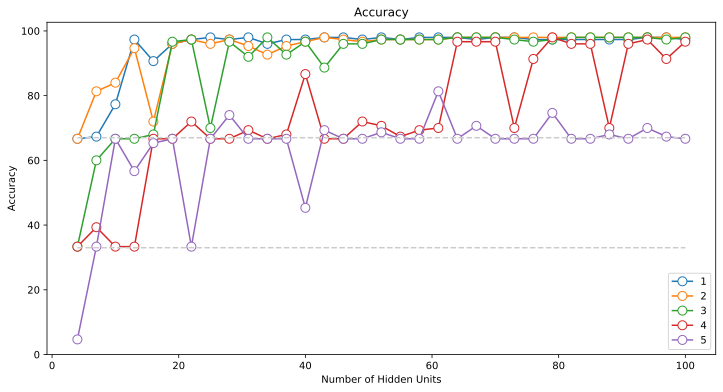

In [30]:
# Show accuracy as a function of the number of hidden units for different layers.
fig, ax = plt.subplots(1, figsize=(12, 6))

ax.plot(numunits, accuracies, 'o-', markerfacecolor='w', markersize=9)
ax.plot(numunits[[0, -1]], [33, 33], '--', color=[0.8, 0.8, 0.8])
ax.plot(numunits[[0, -1]], [67, 67], '--', color=[0.8, 0.8, 0.8])
ax.legend(numlayers)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Number of Hidden Units')
ax.set_title('Accuracy')
plt.show()


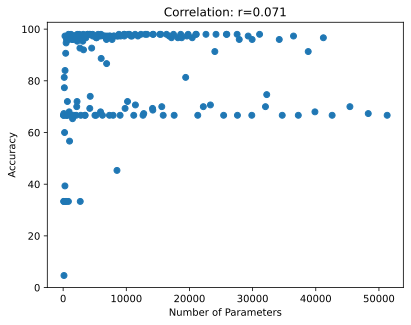

In [31]:
# Analyze the correlation between the number of parameters and accuracy.
x = totalparams.flatten()
y = accuracies.flatten()

# Calculate the correlation coefficient.
r = np.corrcoef(x, y)[0, 1]

# Scatter plot of parameters vs. accuracy.
plt.plot(x, y, 'o')
plt.xlabel('Number of Parameters')
plt.ylabel('Accuracy')
plt.title('Correlation: r=' + str(np.round(r, 3)))
plt.show()


In [ ]:
# 1) Try it again with 1000 training epochs. Do the deeper models eventually learn?
# 
# 2) The categories are coded a "0", "1", and "2". Is there something special about those numbers?
#    Recode the labels to be, e.g., 5, 10, and 17. Or perhaps -2, 0, and 2. Is the model still able to learn?
# 